This file runs SR search for integers orders of Bessel function and then analyses the results

In [11]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


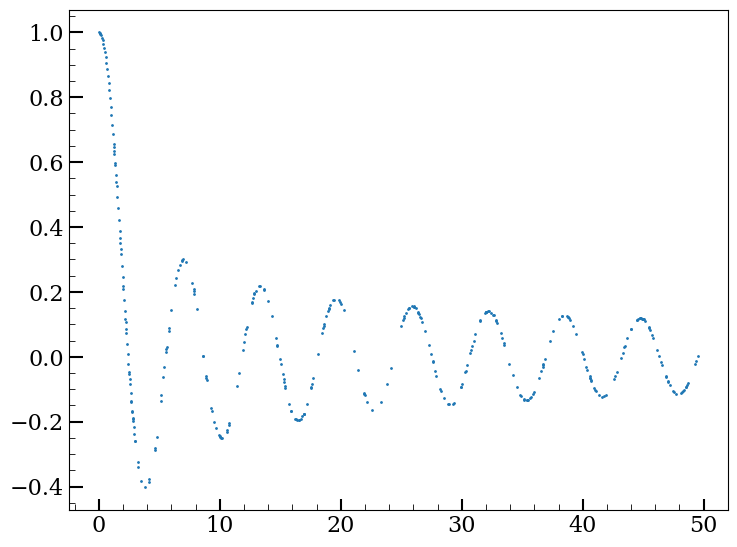

In [241]:
np.random.seed(42) #Keeping the seed for reproducibility

order = 0

x_train = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
x_test = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
# Training data from uniform distribution
# x_test = np.sort(np.concatenate((np.random.uniform(0, 20, 300), np.linspace(0, 1.5, 300))))

# x_train = np.sort(np.random.uniform(0, 60, 1000))
# x_test = np.sort(np.random.uniform(0, 60, 1000))

target_train = special.jv(order, x_train)
target_test = special.jv(order, x_test)

plt.scatter(x_train, target_train, s=1)

In [242]:
bessel_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,cos,sqrt,square",
    'epsilon': 1e-4,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 60,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 3
}

Bessel_0 = Problem(f"Bessel function of order {order}", (x_train, target_train), (x_test, target_test), bessel_0_args)

In [243]:
Bessel_0.solve()
print(len(Bessel_0.solutions))

[0.2511295676231384, 5.0], 342.04, (0.199352622032 + (0.039272014052 * ((-0.148337036371) * X1))), 0.06
[0.21076750755310059, 6.0], 344.94, (0.065916121006 + (0.225556895137 * cos(((-0.974193453789) * X1)))), 0.04
[0.2104114145040512, 7.0], 351.93, (0.820611178875 + ((-0.985866785049) * cos(cos(((-0.487158179283) * X1))))), 0.04
[0.1649303138256073, 8.0], 354.84, (0.528082370758 + ((-0.540626227856) * cos((0.995316505432 / ((-0.504383444786) * X1))))), 0.03
[0.15720421075820923, 9.0], 356.25, (0.587486624718 + ((-0.587490797043) * cos((cos((0.410069763660 * X1)) / (0.487819939852 * X1))))), 0.02
[0.11401773244142532, 10.0], 356.87, ((-0.017891714349) + ((-0.682514727116) * (cos((1.572056055069 + (1.050794601440 * X1))) / (0.765726447105 * X1)))), 0.01
[0.09420553594827652, 11.0], 357.39, ((-0.007604234852) + (0.788119494915 * (cos((1.294234275818 + ((-1.022547364235) * X1))) / sqrt((1.255658268929 * X1))))), 0.01
[0.037696730345487595, 12.0], 354.96, (0.005829062313 + (1.040418505669 *

<Axes: title={'center': 'Bessel function of order 0 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

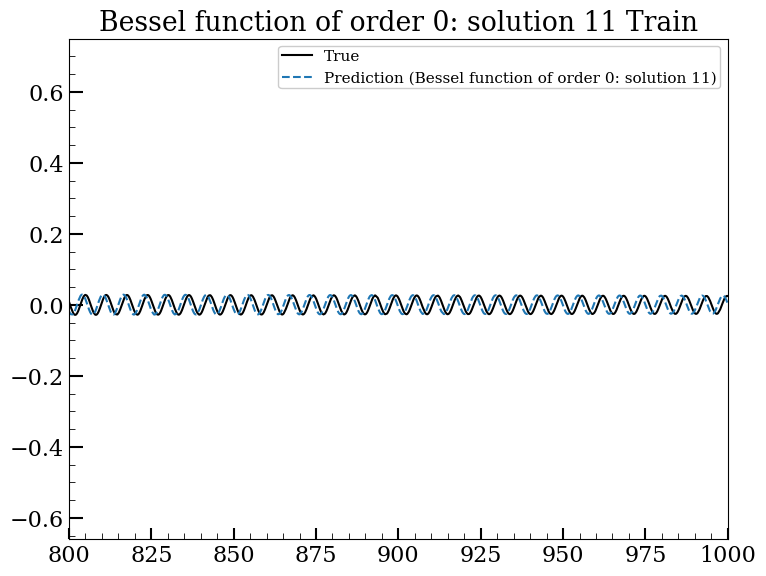

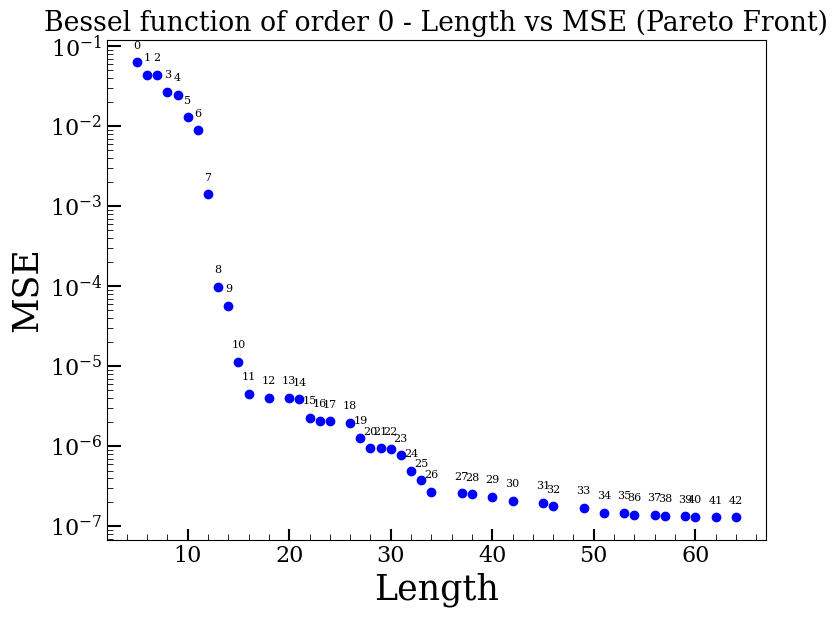

In [255]:
x_outside_train_range = np.sort(np.random.uniform(0, 1000, 10000))
Bessel_0.solutions[11].plot_results(x_outside_train_range, special.jv(order, x_outside_train_range))
plt.ylim(-0.66, 0.75)
plt.xlim(800, 1000)
Bessel_0.plot_l_vs_mse()

<IPython.core.display.Math object>

{'b0': 0.0005774918830000475, 'b1': 1.4845980405809769, 'b2': 1.0013238191600067, 'b3': 0.8296617269520539, 'b4': 3.4075038433070404, 'b5': 1.0544051746151126}


/tmp/ipykernel_58990/3086724406.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2)


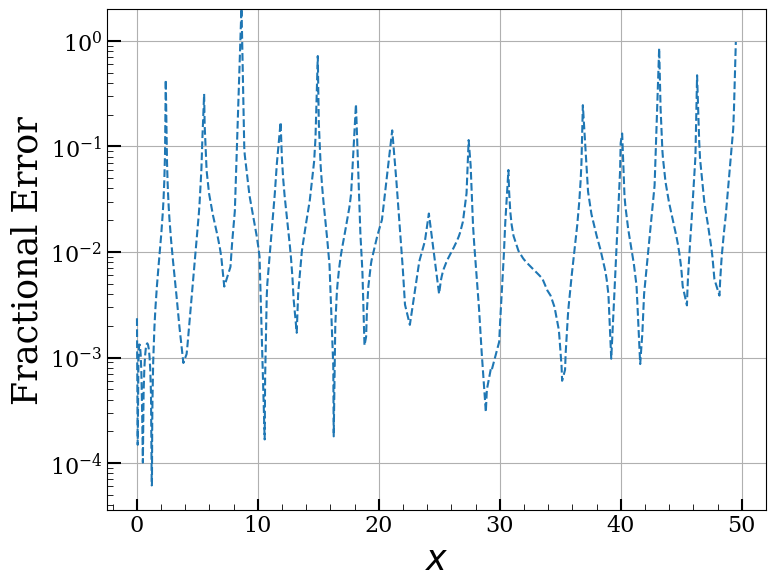

In [257]:
k=11
Bessel_0.solutions[k].display_expression()
b_vals = Bessel_0.solutions[k].extract_and_format()[1]
print(b_vals)
Bessel_0.solutions[k].plot_fractional_error_bessel(x_train, order, kind='first', spherical=False)
plt.ylim(0, 2)

In [258]:
str(Bessel_0.solutions[k].sympy_expr)

'b0 + b1*cos(X1*b2 - b3)/sqrt(X1*b4 + cos(sqrt(X1)*b5)**2)'

In [34]:
solution = Bessel_0.solutions[k]
sympy_expr = 'b4*cos(X1 - pi/4)/sqrt(X1*b7 + cos(sqrt(X1)*b8)**4)'

Selected_sol_bessel_0 = Promising_solution(sp.parsing.sympy_parser.parse_expr(sympy_expr), (x_train, target_train), solution, initial_parameters=b_vals)

Selected_sol_bessel_0.optimisation()

`gtol` termination condition is satisfied.
Number of iterations: 109, function evaluations: 436, CG iterations: 204, optimality: 8.58e-10, constraint violation: 0.00e+00, execution time: 0.14 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b4        | 3.72337   | 1.71223   | 2.01114       
b7        | 1.0018    | 4.59606   | 3.59426       
b8        | 2.30177   | 1.68246   | 0.619305      



(1.71223045319128*sin(X1 + pi/4)/sqrt(4.59606225827433*X1 + cos(1.68246253008018*sqrt(X1))**4),
 {'b4': np.float64(1.7122304531912838),
  'b7': np.float64(4.5960622582743325),
  'b8': np.float64(1.6824625300801752)},
 {'b4': np.float64(2.0111410525455664),
  'b7': np.float64(3.5942612443273445),
  'b8': np.float64(0.6193048191629889)},
 np.float64(0.0006707695522366163))

In [261]:
sp.latex(Selected_sol_bessel_0.sympy_expr)#, Selected_sol.modified_parameters

'\\frac{b_{4} \\sin{\\left(X_{1} + \\frac{\\pi}{4} \\right)}}{\\sqrt{X_{1} b_{7} + \\cos^{4}{\\left(\\sqrt{X_{1}} b_{8} \\right)}}}'

<Axes: title={'center': 'Absolute Error for Bessel Function approx. (order=0)'}, xlabel='$x$', ylabel='Absolute Error'>

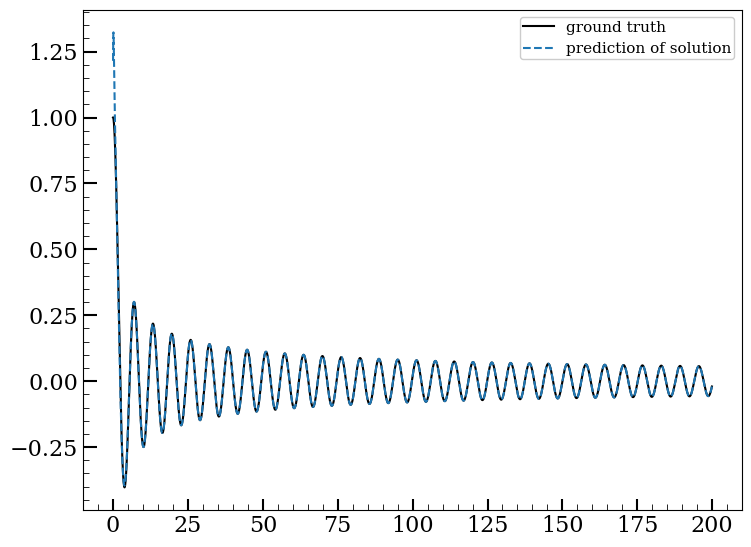

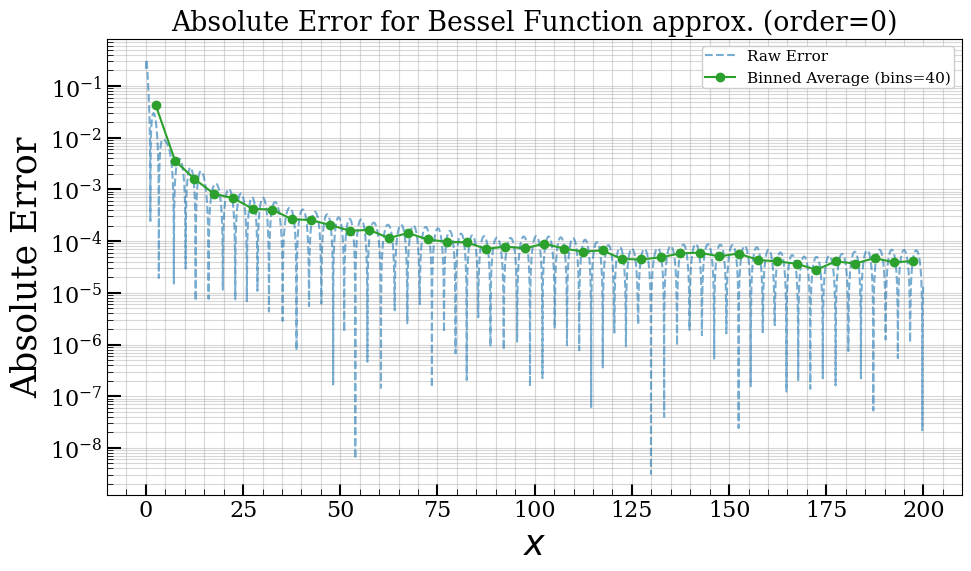

In [36]:
Selected_sol_bessel_0.plot_comparison(x_outside_train_range, special.jv(order, x_outside_train_range))
Selected_sol_bessel_0.plot_error(x_outside_train_range, order, kind='first', spherical=False, metric='absolute', smoothing = 'binned')

----------------- Now for order 2 --------------------------

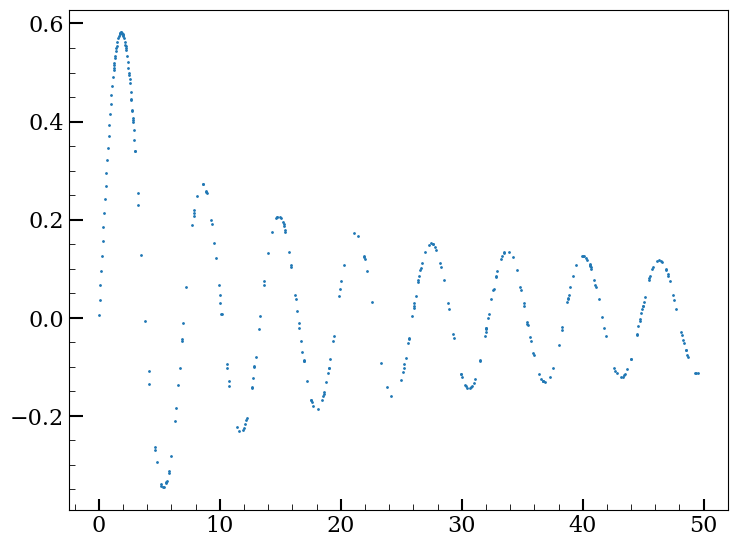

In [142]:
np.random.seed(42) #Keeping the seed for reproducibility

order_1 = 1

x_train = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
x_test = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
# Training data from uniform distribution
# x_test = np.sort(np.concatenate((np.random.uniform(0, 20, 300), np.linspace(0, 1.5, 300))))

# x_train = np.sort(np.random.uniform(0, 60, 1000))
# x_test = np.sort(np.random.uniform(0, 60, 1000))

target_train_bessel_1 = special.jv(order_1, x_train)
target_test_bessel_1 = special.jv(order_1, x_test)

plt.scatter(x_train, target_train_bessel_1, s=1)

In [152]:
bessel_1_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,cos,sqrt,square",
    'epsilon': 1e-4,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 2
}

Bessel_1 = Problem(f"Bessel function of order {order_1}", (x_train, target_train_bessel_1), (x_test, target_test_bessel_1), bessel_1_args)

In [153]:
Bessel_1.solve()
print(len(Bessel_1.solutions))

[0.19991132616996765, 5.0], 338.03, (0.207310855389 + ((-0.005121952854) * (1.167840123177 * X1))), 0.04
[0.18657582998275757, 6.0], 343.08, (0.073086649179 + ((-0.168186530471) * cos((1.026555776596 * X1)))), 0.03
[0.1751406043767929, 7.0], 342.89, (0.162759393454 + (0.221560642123 * cos(sqrt((0.390921294689 * X1))))), 0.03
[0.12965531647205353, 8.0], 346.30, (0.045258369297 + ((-0.262981981039) * cos((1.191412329674 - ((-0.986529409885) * X1))))), 0.02
[0.11062305420637131, 10.0], 353.30, (0.143393367529 + ((-0.247117698193) * ((0.017728820443 * X1) + cos((1.156967401505 - ((-0.987230300903) * X1)))))), 0.01
[0.07997819781303406, 11.0], 359.10, (0.009508697316 + (0.421103209257 * (cos(((-1.660432577133) - ((-0.971195340157) * X1))) / sqrt((0.348129481077 * X1))))), 0.01
[0.04769684746861458, 12.0], 356.75, (0.012929301709 + ((-1.445457100868) * (cos((1.271259784698 - ((-0.980070114136) * X1))) / (1.902958154678 + (0.319554626942 * X1))))), 0.00
[0.0451001413166523, 13.0], 362.80, ((-

<Axes: title={'center': 'Bessel function of order 1 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

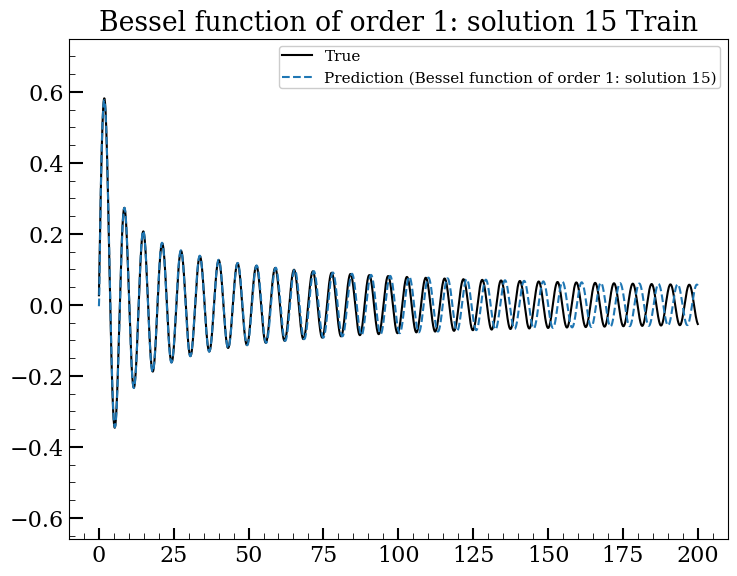

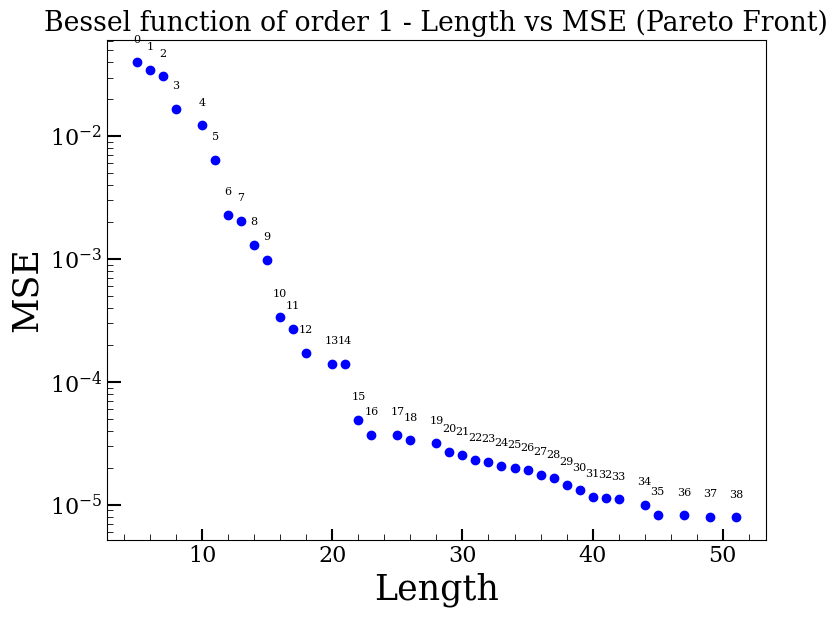

In [238]:
x_outside_train_range = np.sort(np.random.uniform(0, 200, 10000))
Bessel_1.solutions[15].plot_results(x_outside_train_range, special.jv(order_1, x_outside_train_range))
plt.ylim(-0.66, 0.75)
Bessel_1.plot_l_vs_mse()

In [174]:
c_par_1 = 9

Bessel_1.solutions[c_par_1].display_expression(), Bessel_1.solutions[c_par_1].b_vals, str(Bessel_1.solutions[c_par_1].sympy_expr)

<IPython.core.display.Math object>

(None,
 {'b0': 0.06443745642900467,
  'b1': 0.8206953406330513,
  'b2': 0.9900181293489823,
  'b3': 1.108355522155989,
  'b4': 0.9884766340260285,
  'b5': 0.300714980480393},
 '-b0 - b1*cos(X1*b2 + b3)/sqrt(X1*b2 + b4) + b5/sqrt(X1*b2 + b4)')

In [ ]:
#'b0 - b1*cos(X1*b2 + sqrt(X1*b3 + b4/X1))/(sqrt(X1)*b5 + b6/X1**2)')
Solution_t_modify = Bessel_1.solutions[c_par_1].int_analysis_and_modification()

  - Rounding parameters: ['b4']
Creating a new Promising solution: -b0 - b1*cos(X1*b2 + b3)/sqrt(X1*b2 + 1) + b5/sqrt(X1*b2 + 1)
Re-optimizing the remaining float parameters: ['b0', 'b1', 'b2', 'b3', 'b5']
--- Starting Multi-Start Optimization (150 runs) ---
  Running optimization 1/150...
`xtol` termination condition is satisfied.
Number of iterations: 45, function evaluations: 270, CG iterations: 114, optimality: 1.86e-07, constraint violation: 0.00e+00, execution time: 0.057 s.

Optimization summary:
Parameter | Old Value | New Value  | Abs Difference
--------- | --------- | ---------  | --------------
b0        | 0.0623886 | 0.00451144 | 0.0578772     
b1        | 0.790967  | 0.814127   | 0.02316       
b2        | 1.0254    | 0.998821   | 0.0265764     
b3        | 1.05877   | 0.840623   | 0.218149      
b5        | 0.307055  | 0.0274727  | 0.279582      

  Running optimization 2/150...
`xtol` termination condition is satisfied.
Number of iterations: 49, function evaluations: 294

In [177]:
str(Solution_t_modify.sympy_expr), Solution_t_modify.modified_parameters

('-b0 - b1*cos(X1*b2 + b3)/sqrt(X1*b2 + 1) + b5/sqrt(X1*b2 + 1)',
 {'b0': np.float64(0.0045117197642750625),
  'b1': np.float64(0.8141273111601366),
  'b2': np.float64(0.9988208559152539),
  'b3': np.float64(0.8406223103190025),
  'b5': np.float64(0.02747439673895281)})

In [179]:
sympy_expr_bss_1 = ' b1*cos(X1 + pi/4 )/sqrt(X1*b2 + 1) + b5/sqrt(X1*b2 + 1)'

Selected_sol_bessel_1 = Promising_solution(sp.parsing.sympy_parser.parse_expr(sympy_expr_bss_1), (x_train, target_train_bessel_1), Bessel_1.solutions[c_par_1], initial_parameters=Solution_t_modify.modified_parameters)

Selected_sol_bessel_1.optimisation()

`gtol` termination condition is satisfied.
Number of iterations: 672, function evaluations: 2688, CG iterations: 1163, optimality: 8.64e-09, constraint violation: 0.00e+00, execution time: 0.79 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b1        | 0.814127  | -8.54365  | 9.35778       
b2        | 0.998821  | 114.534   | 113.535       
b5        | 0.0274744 | 0.0126805 | 0.0147939     



(-8.54365124120603*cos(X1 + pi/4)/sqrt(114.533506899236*X1 + 1) + 0.012680530758979/sqrt(114.533506899236*X1 + 1),
 {'b1': np.float64(-8.543651241206026),
  'b2': np.float64(114.53350689923631),
  'b5': np.float64(0.012680530758978951)},
 {'b1': np.float64(9.357778552366163),
  'b2': np.float64(113.53468604332106),
  'b5': np.float64(0.014793865979973859)},
 np.float64(0.008012453411592556))

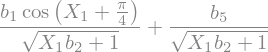

In [180]:
Selected_sol_bessel_1.sympy_expr

<Axes: title={'center': 'Absolute Error Comparison for Bessel Function (order=1)'}, xlabel='$x$', ylabel='Absolute Error'>

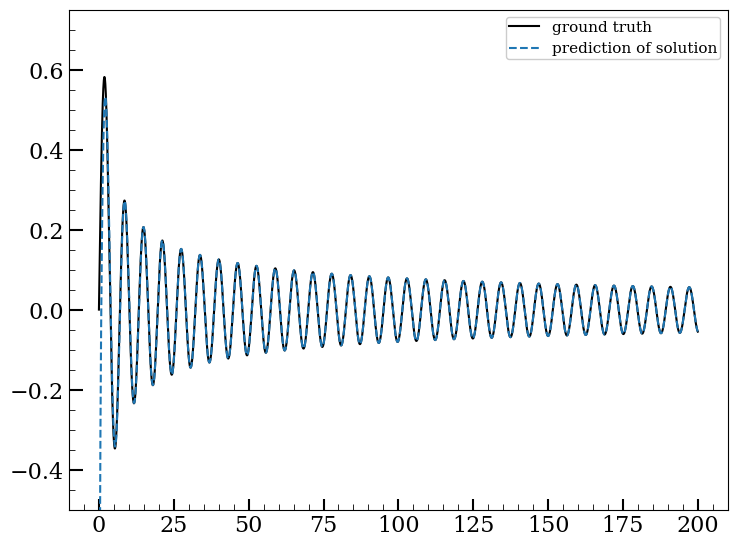

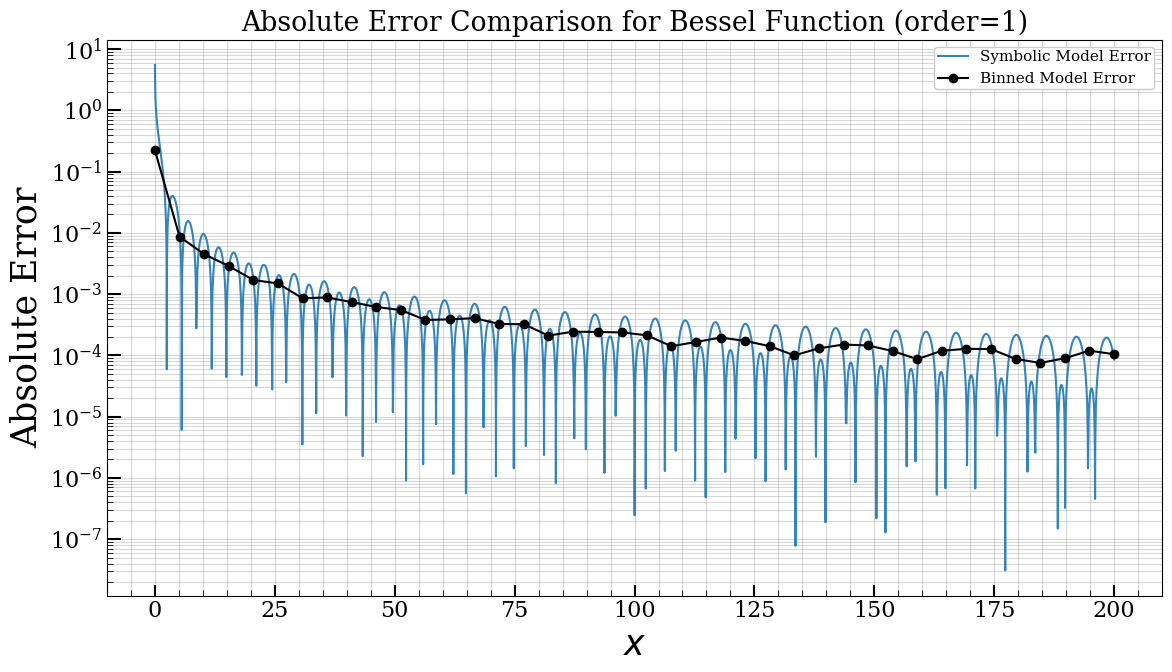

In [184]:
Selected_sol_bessel_1.plot_comparison(x_outside_train_range, special.jv(order_1, x_outside_train_range))
plt.ylim(-1/2, 3/4)
Selected_sol_bessel_1.plot_error(x_outside_train_range, order_1, kind='first', spherical=False, metric='absolute', smoothing = 'binned')

Using recurrence relation to find bessels of higher orders

<string>:6: RuntimeWarning: overflow encountered in power
<string>:7: RuntimeWarning: invalid value encountered in add
<string>:6: RuntimeWarning: overflow encountered in scalar multiply
<string>:6: RuntimeWarning: invalid value encountered in divide


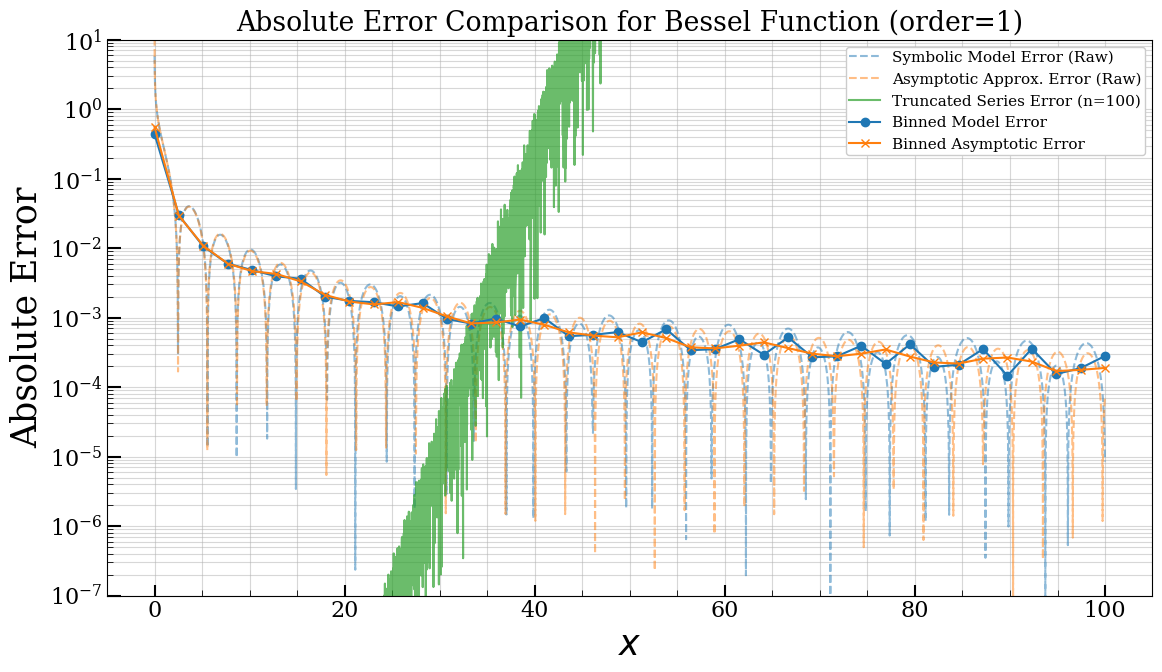

In [268]:
x_outside_train_range = np.sort(np.random.uniform(0, 100, 10000))
Selected_sol_bessel_1.plot_error(x_outside_train_range, order_1, kind='first', spherical=False, metric='absolute', smoothing = 'binned', show_approx=True, show_trunc=True, trunc_index=100)
plt.ylim(1e-7, 1e1)

Converting symbolic expressions to numerical functions...
Initial numerical arrays created.
Calculating MSE for base orders 0 and 1...
Calculating errors for orders 2 through 10...
Calculation complete.


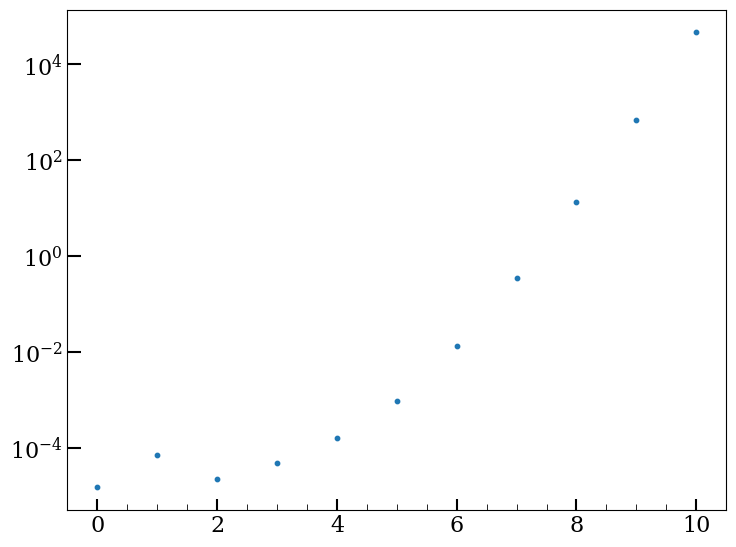

In [227]:
def compute_recurrence_error_from_symbolic(j0_expr, j1_expr, x_data, max_order):
    """
    Takes symbolic sympy expressions for J0 and J1, and computes the 
    recurrence error for higher orders, including the base cases 0 and 1.

    Args:
        j0_expr (sympy.Expr): A sympy expression for J0(x) with variable 'X1'.
        j1_expr (sympy.Expr): A sympy expression for J1(x) with variable 'X1'.
        x_data (np.ndarray): The x-values to evaluate the expressions on.
        max_order (int): The maximum order of the Bessel function to compute.

    Returns:
        tuple[np.ndarray, np.ndarray]: A tuple containing:
            - orders (np.ndarray): The orders computed (from 0 to max_order).
            - mse_values (np.ndarray): The MSE for each corresponding order.
    """
    if max_order < 1:
        raise ValueError("max_order must be 1 or greater.")

    # --- Part 1: Convert Symbolic Expressions to Numerical Arrays ---
    print("Converting symbolic expressions to numerical functions...")
    X1 = sp.Symbol('X1')
    
    modules_map = [{'sqrt': np.sqrt}, 'numpy']
    f_j0 = sp.lambdify((X1,), j0_expr, modules=modules_map)
    f_j1 = sp.lambdify((X1,), j1_expr, modules=modules_map)
    
    j0_values = f_j0(x_data)
    j1_values = f_j1(x_data)
    print("Initial numerical arrays created.")

    # --- NEW: Calculate MSE for base cases (order 0 and 1) ---
    print("Calculating MSE for base orders 0 and 1...")
    j0_true = special.jv(0, x_data)
    j1_true = special.jv(1, x_data)
    
    mse0 = np.mean((j0_true - j0_values)**2)
    mse1 = np.mean((j1_true - j1_values)**2)

    # --- Part 2: Perform Recurrence Calculation and Error Analysis ---
    print(f"Calculating errors for orders 2 through {max_order}...")
    x_safe = np.copy(x_data)
    zero_mask = (x_safe == 0)
    epsilon = 1e-30
    x_safe[zero_mask] = epsilon
    
    # Initialize containers with the base case results
    mse_values = [mse0, mse1]
    orders_computed = np.arange(0, max_order + 1)
    
    # Check if we only needed to compute up to order 1
    if max_order == 1:
        return orders_computed, np.array(mse_values)
        
    j_prev = j0_values
    j_curr = j1_values

    # Loop to calculate errors for orders 2 and up
    for v in range(1, max_order):
        j_next_recurrent = (2 * v / x_safe) * j_curr - j_prev
        j_next_recurrent[zero_mask] = 0.0
        j_next_true = special.jv(v + 1, x_data)
        mse = np.mean((j_next_true - j_next_recurrent)**2)
        mse_values.append(mse)
        j_prev = j_curr
        j_curr = j_next_recurrent
        
    print("Calculation complete.")
    return orders_computed, np.array(mse_values)


orders, mse_values = compute_recurrence_error_from_symbolic(Selected_sol_bessel_0.numerical_expr,Selected_sol_bessel_1.numerical_expr , np.linspace(2, 50, 2000) , 10)

plt.scatter(orders, mse_values, s=10)
plt.yscale("log")
mse_values[-1]

<Axes3D: title={'center': 'Surface of Absolute Residual in Bessel Recurrence'}, xlabel='x value', ylabel='Bessel Order (v)', zlabel='log10(Absolute Residual)'>

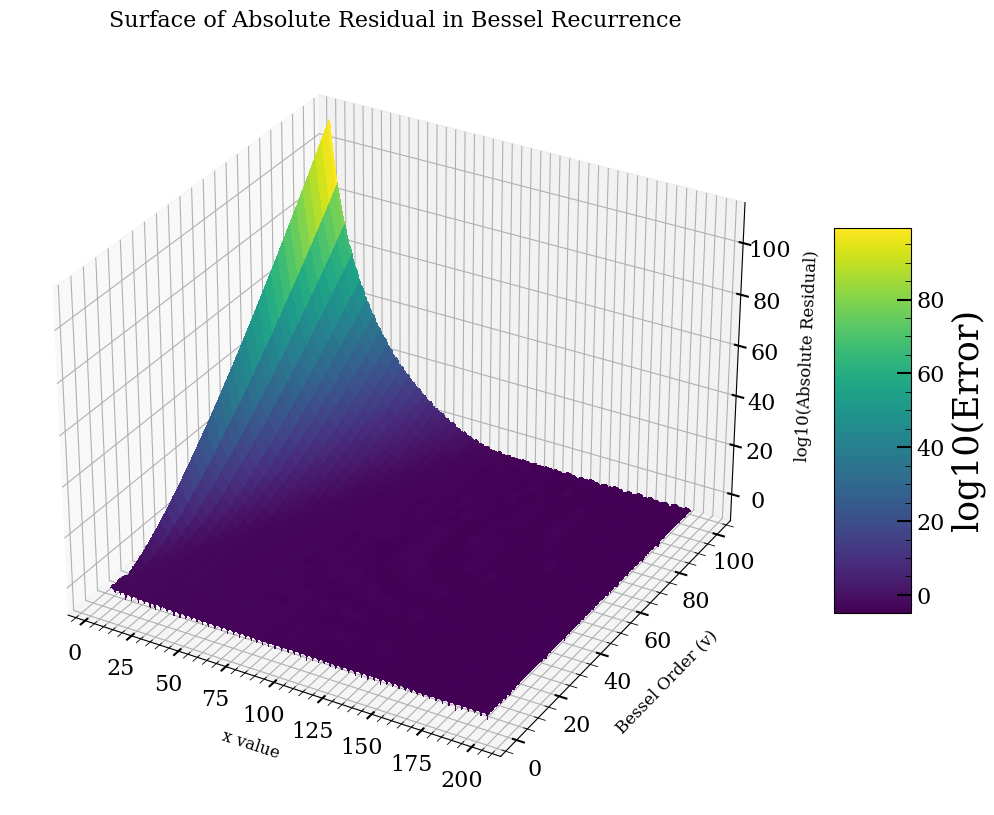

In [237]:
# Required for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_recurrence_error_surface(j0_expr, j1_expr, x_data, max_order, ax=None):
    """
    Takes symbolic sympy expressions for J0 and J1, computes the recurrence,
    and creates a 3D surface plot of the absolute residual against order and x.

    Args:
        j0_expr (sympy.Expr): A sympy expression for J0(x) with variable 'X1'.
        j1_expr (sympy.Expr): A sympy expression for J1(x) with variable 'X1'.
        x_data (np.ndarray): The x-values to evaluate the expressions on.
        max_order (int): The maximum order of the Bessel function to compute.
        ax (Axes3D, optional): A 3D axes object to plot on. If None, a new
                               figure and axes are created.

    Returns:
        matplotlib.axes.Axes: The 3D axes containing the plot.
    """
    if max_order < 1:
        raise ValueError("max_order must be 1 or greater.")

    # --- Part 1: Convert Symbolic Expressions to Numerical Arrays ---
    X1 = sp.Symbol('X1')
    modules_map = [{'sqrt': np.sqrt}, 'numpy']
    f_j0 = sp.lambdify((X1,), j0_expr, modules=modules_map)
    f_j1 = sp.lambdify((X1,), j1_expr, modules=modules_map)
    j0_values = f_j0(x_data)
    j1_values = f_j1(x_data)

    # --- Part 2: Perform Recurrence and Store All Residuals ---
    x_safe = np.copy(x_data)
    zero_mask = (x_safe == 0)
    epsilon = 1e-30
    x_safe[zero_mask] = epsilon
    
    # Store the absolute residual for each order in this list
    all_residuals = []
    orders = np.arange(0, max_order + 1)
    
    # Calculate residuals for base cases
    all_residuals.append(np.abs(special.jv(0, x_data) - j0_values))
    all_residuals.append(np.abs(special.jv(1, x_data) - j1_values))
    
    j_prev = j0_values
    j_curr = j1_values

    # Loop to calculate residuals for orders 2 and up
    for v in range(1, max_order):
        j_next_recurrent = (2 * v / x_safe) * j_curr - j_prev
        j_next_recurrent[zero_mask] = 0.0
        j_next_true = special.jv(v + 1, x_data)
        residual = np.abs(j_next_true - j_next_recurrent)
        all_residuals.append(residual)
        j_prev = j_curr
        j_curr = j_next_recurrent
        
    # Convert list of 1D arrays into a 2D array for plotting
    Z_residuals = np.array(all_residuals)

    # --- Part 3: Create the 3D Surface Plot ---
    if ax is None:
        fig = plt.figure(figsize=(14, 10))
        ax = fig.add_subplot(111, projection='3d')

    # Create a meshgrid for the X (x_data) and Y (orders) axes
    X, Y = np.meshgrid(x_data, orders)
    
    # Plot the surface. Use a logarithmic color map for better visualization.
    # We add a small epsilon to the residuals before taking the log to avoid log(0).
    surf = ax.plot_surface(X, Y, np.log10(Z_residuals + epsilon), cmap=cm.viridis,
                           linewidth=0, antialiased=False)

    ax.set_xlabel('x value', fontsize=12, labelpad=10)
    ax.set_ylabel('Bessel Order (v)', fontsize=12, labelpad=10)
    ax.set_zlabel('log10(Absolute Residual)', fontsize=12, labelpad=10)
    ax.set_title('Surface of Absolute Residual in Bessel Recurrence', fontsize=16)
    
    # Add a color bar which maps values to colors.
    fig = ax.get_figure()
    fig.colorbar(surf, shrink=0.5, aspect=5, label='log10(Error)')

    return ax

plot_recurrence_error_surface(Selected_sol_bessel_0.numerical_expr,Selected_sol_bessel_1.numerical_expr , np.linspace(5, 200, 2000) , 100)

Experiment with Hilbert transform - decomposing the function to amplitude and phase

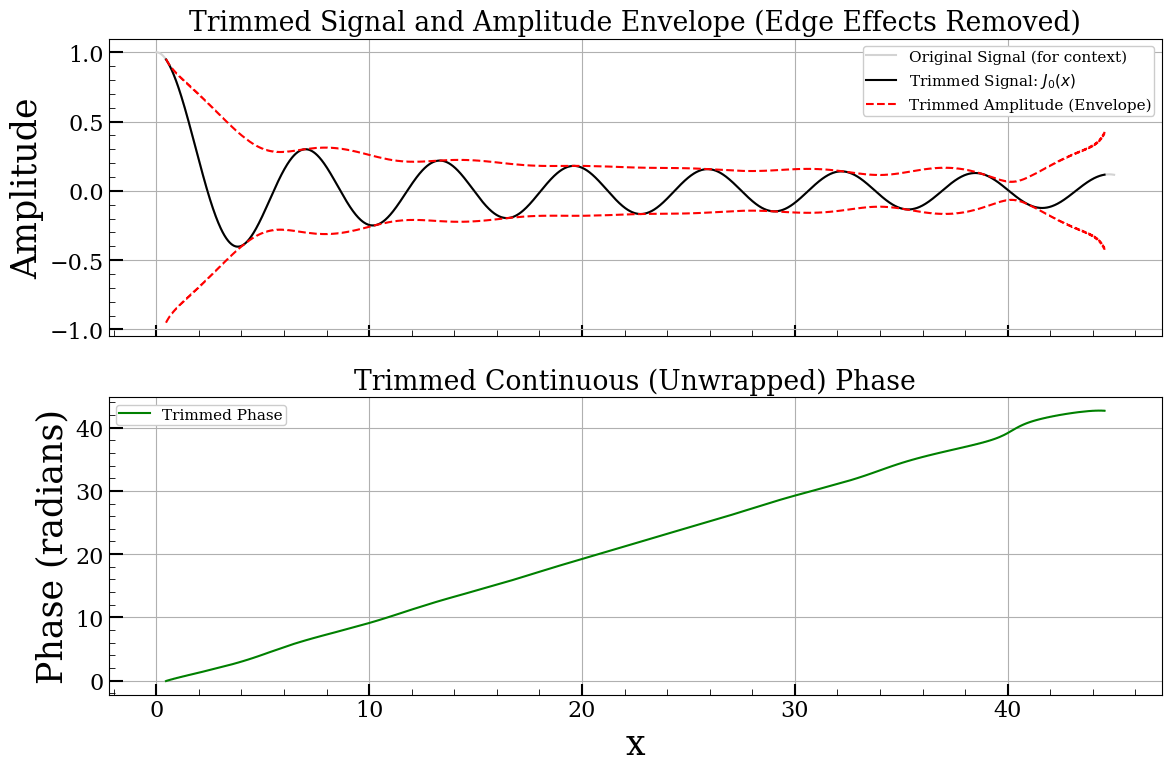

Original shape of x_data: (2000,)
------------------------------
Shapes of data after trimming:
Shape of x_data_trimmed: (1960,)
Shape of target_amplitude_trimmed: (1960,)
Shape of target_phase_trimmed: (1960,)


In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.signal import hilbert

# --- Step 1: Generate the Ideal Signal ---
# We'll use the Bessel function of the first kind, order 0.

order = 0
# Generate x-values. Start from a small positive number to avoid issues at x=0.
# Use enough points for a smooth curve.
x_data_hilbert = np.linspace(1e-2, 45, 2000) 
y_true_bessel = special.jv(order, x_data_hilbert)


# --- Step 2: Compute the Analytic Signal using the Hilbert Transform ---
# This is the core step. 'hilbert' takes your real-valued signal and returns
# a complex-valued array known as the analytic signal.
analytic_signal = hilbert(y_true_bessel)


# --- Step 3: Extract Instantaneous Amplitude and Phase ---

# The instantaneous amplitude is the magnitude (absolute value) of the analytic signal.
# This gives us the envelope of the oscillation.
target_amplitude = np.abs(analytic_signal)

# The instantaneous phase is the angle of the analytic signal.
# CRITICAL: We use np.unwrap() to remove the 2*pi jumps that np.angle creates,
# resulting in a smooth, continuous phase curve that is perfect for regression.
target_phase = np.unwrap(np.angle(analytic_signal))


# --- NEW SECTION: Implement Solution 1 - Trim the Edges ---
# Define what percentage of the signal to trim from each end. 5% is a good start.
trim_percent = 1.0

trim_points = int(len(x_data_hilbert) * trim_percent / 100)

# Use array slicing to keep only the central part of the data.
# It is CRUCIAL to trim all arrays to keep them synchronized.
x_data_trimmed = x_data_hilbert[trim_points:-trim_points]
y_true_bessel_trimmed = y_true_bessel[trim_points:-trim_points]
target_amplitude_trimmed = target_amplitude[trim_points:-trim_points]
target_phase_trimmed = target_phase[trim_points:-trim_points]
# --- END OF NEW SECTION ---


# --- Step 4: Visualize the TRIMMED Results ---
# The plotting code is updated to use the new '_trimmed' variables.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Amplitude Envelope
ax1.plot(x_data_hilbert, y_true_bessel, color='lightgray', label='Original Signal (for context)')
ax1.plot(x_data_trimmed, y_true_bessel_trimmed, label=f'Trimmed Signal: $J_{order}(x)$', color='k')
ax1.plot(x_data_trimmed, target_amplitude_trimmed, label='Trimmed Amplitude (Envelope)', color='red', linestyle='--')
ax1.plot(x_data_trimmed, -target_amplitude_trimmed, color='red', linestyle='--') # Plot negative envelope
ax1.set_title('Trimmed Signal and Amplitude Envelope (Edge Effects Removed)')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True)

# Plot 2: Unwrapped Phase
ax2.plot(x_data_trimmed, target_phase_trimmed, label='Trimmed Phase', color='green')
ax2.set_title('Trimmed Continuous (Unwrapped) Phase')
ax2.set_ylabel('Phase (radians)')
ax2.set_xlabel('x')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print the shapes of the new trimmed arrays to confirm they are ready for SR
print(f"Original shape of x_data: {x_data_hilbert.shape}")
print("-" * 30)
print("Shapes of data after trimming:")
print(f"Shape of x_data_trimmed: {x_data_trimmed.shape}")
print(f"Shape of target_amplitude_trimmed: {target_amplitude_trimmed.shape}")
print(f"Shape of target_phase_trimmed: {target_phase_trimmed.shape}")

In [115]:
amplitude_bessel_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sqrt,square",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 60,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 3
}

amplitude_bessel_0 = Problem(f"Amplitude of Bessel (Hilber decomp) of {order}", (x_data_hilbert, target_amplitude), (x_data_hilbert, target_amplitude), amplitude_bessel_0_args)

In [116]:
amplitude_bessel_0.solve()

[0.14951059222221375, 5.0], 1875.56, (0.413879096508 + ((-0.009192847647) * (0.827470004559 * X1))), 0.02
[0.1302984356880188, 6.0], 1874.27, (0.590736031532 + ((-0.085457019508) * sqrt((0.829215526581 * X1)))), 0.02
[0.11465900391340256, 7.0], 1873.04, (0.917433977127 + ((-0.413427978754) * sqrt(sqrt((0.384871721268 * X1))))), 0.01
[0.07190920412540436, 8.0], 1875.50, (1.155063390732 + ((-0.464581400156) * (sqrt((0.795335173607 * X1)) + ((-0.089973241091) * X1)))), 0.01
[0.06639023870229721, 9.0], 1876.88, (1.779660463333 + ((-1.089822649956) * sqrt((sqrt((0.823503851891 * X1)) + ((-0.090933717787) * X1))))), 0.00
[0.059108711779117584, 10.0], 1872.63, (0.168780192733 + (0.085527546704 * ((((1.360723257065 - (0.055789921433 * X1)) ^ 2) ^ 2) ^ 2))), 0.00
[0.04347224161028862, 12.0], 1880.19, (0.275283813477 + (0.100285589695 * (((((1.304026842117 - (0.055789921433 * X1)) ^ 2) ^ 2) ^ 2) - (0.046591248363 * X1)))), 0.00
[0.04345301538705826, 13.0], 1883.89, (0.275017023087 + (0.099887296

<Axes: title={'center': 'Amplitude of Bessel (Hilber decomp) of 0 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

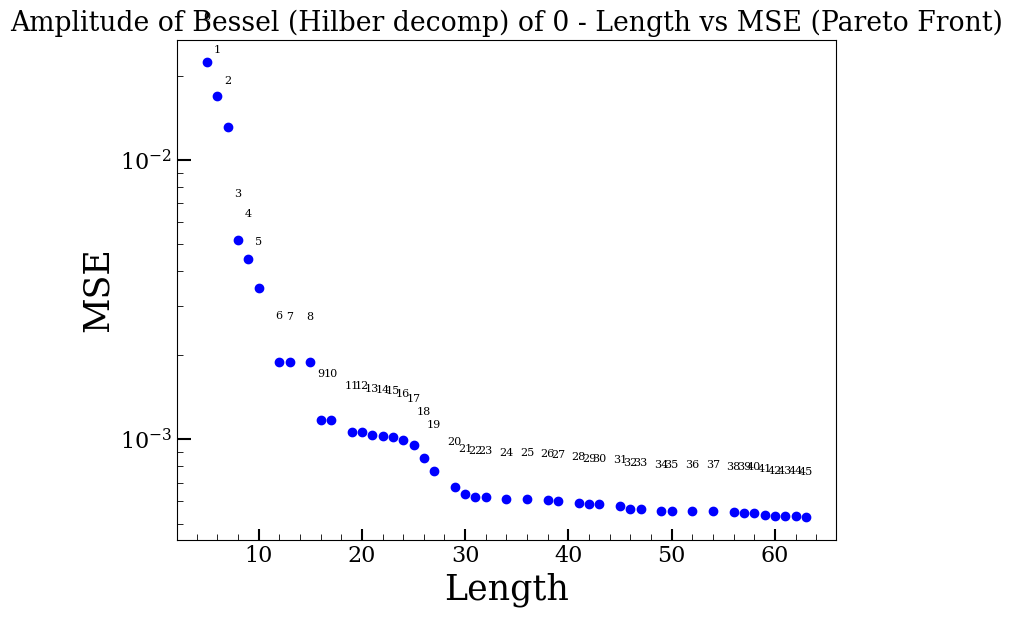

In [117]:
amplitude_bessel_0.plot_l_vs_mse()

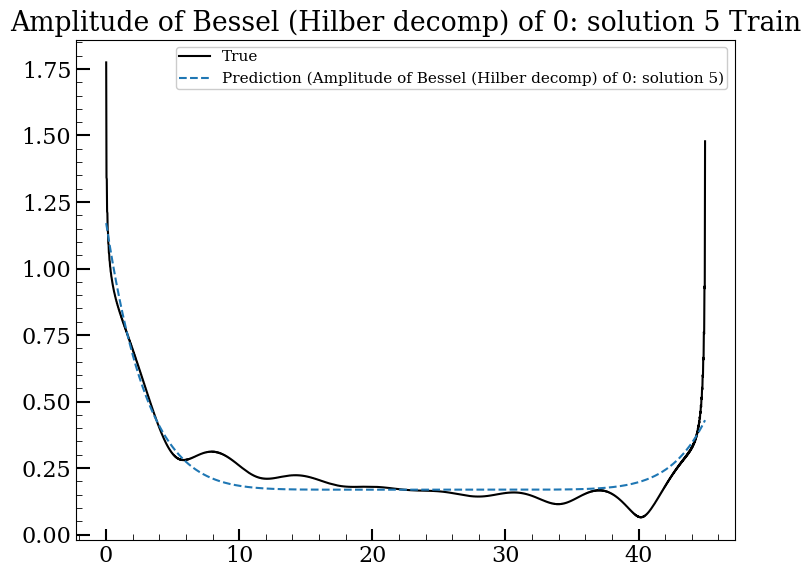

In [118]:
c_amp = 5
amplitude_bessel_0.solutions[c_amp].plot_results()
amplitude_bessel_0.solutions[c_amp].sympy_expr

In [119]:
phase_bessel_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sqrt,square",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 60,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 3
}

phase_bessel_0 = Problem(f"Phase of Bessel (Hilber decomp) of {order}", (x_data_hilbert, target_phase), (x_data_hilbert, target_phase), phase_bessel_0_args)

In [120]:
phase_bessel_0.solve()

[0.23572853207588196, 5.0], 1919.15, ((-0.767740428448) + (31.918746948242 * (0.031282607466 * X1))), 0.06
[0.23178981244564056, 7.0], 1951.69, ((-0.767877578735) + (12156.922851562500 * ((1.696604967117 * X1) - (1.696522831917 * X1)))), 0.05
[0.2302199751138687, 9.0], 1982.39, ((-11106.750000000000) + (12161.154296875000 * ((0.913233458996 + (1.696604967117 * X1)) - (1.696522831917 * X1)))), 0.05
[0.2265997976064682, 10.0], 1930.92, ((-0.834764897823) + ((-0.646002292633) * (((((0.021120525897 * X1) ^ 2) ^ 2) ^ 2) + ((-1.553566694260) * X1)))), 0.05
[0.21247543394565582, 11.0], 1929.98, ((-0.841038644314) + ((-0.932333469391) * (((((((-0.021912395954) * X1) ^ 2) ^ 2) ^ 2) ^ 2) - (1.076560020447 * X1)))), 0.05
[0.18490727245807648, 12.0], 1918.84, ((-0.841399192810) + ((-6.730923175812) * (((((((0.021120525897 * X1) ^ 2) ^ 2) ^ 2) ^ 2) ^ 2) + ((-0.149098381400) * X1)))), 0.03
[0.16551573574543, 13.0], 1914.40, ((-0.827346742153) + ((-1.627696752548) * (((((((((-0.022293459624) * X1) ^ 

<Axes: title={'center': 'Phase of Bessel (Hilber decomp) of 0 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

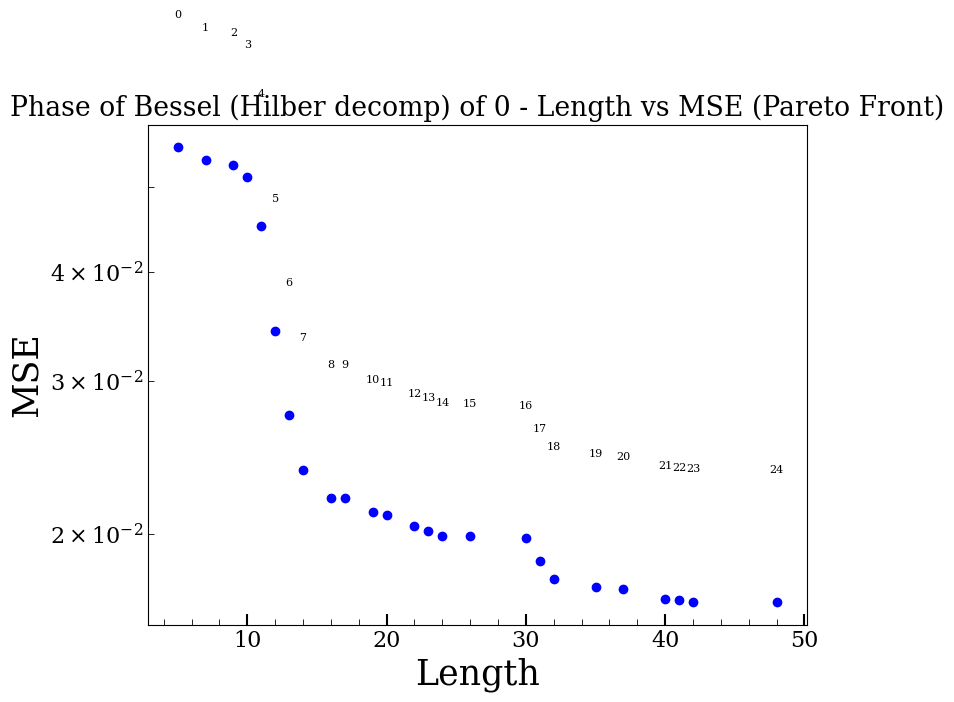

In [121]:
phase_bessel_0.plot_l_vs_mse()

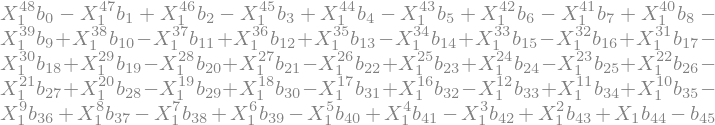

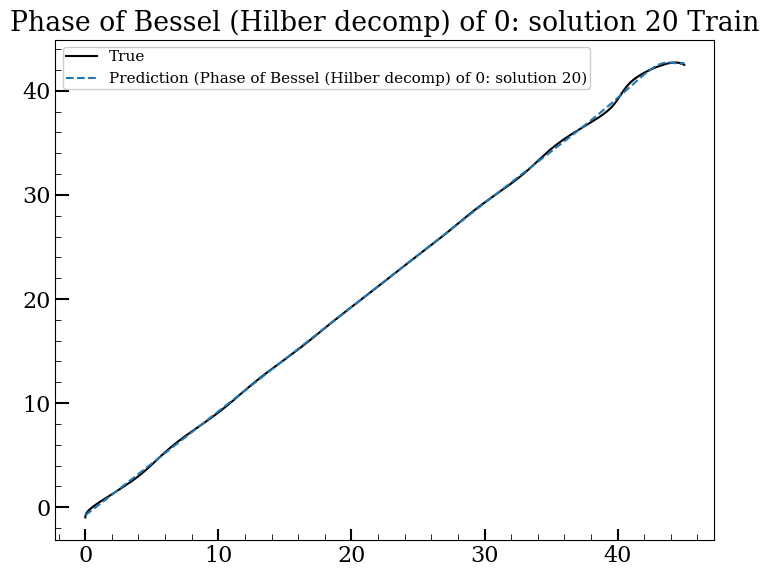

In [122]:
c_phi = 20
phase_bessel_0.solutions[c_phi].plot_results()
phase_bessel_0.solutions[c_phi].sympy_expr

--- Final Expression with Numerical Constants ---
(1.33119141334743e-12*X1**8 - 2.40304874804086e-10*X1**7 + 1.89785361598455e-8*X1**6 - 8.56494924420382e-7*X1**5 + 2.41583290914553e-5*X1**4 - 0.000436102891709589*X1**3 + 0.00492029403806971*X1**2 - 0.0325129176351382*X1 + 0.0516938868285663 + 0.0141838623895758/(0.605718868646136*sqrt(X1) + 0.000427476799245374*X1**3 - 0.0249160658292915*X1**2 + 0.272132966478409*X1) + 1.41260197266115/(1.49761025483008*sqrt(X1) + 1.10167610645294/(1.67408294881916e-6*X1**8 - 1.02960701806945e-5*X1**7 + 1.58309152543112e-5*X1**6 - 0.00403175315993209*X1**4/(0.409786083751385*X1**2 - 2.01128465566171*X1 + 2.4679132152728) + 0.01239819493866*X1**3/(0.409786083751385*X1**2 - 2.01128465566171*X1 + 2.4679132152728) + 0.882325470447995 + 2.42745342369199/(0.167924634436304*X1**4 - 1.6483929247056*X1**3 + 6.06789894914982*X1**2 - 9.9273519627659*X1 + 6.09059563811934))) + 0.0116822279150703/(2.52329957485199 - 0.0557899214330035*X1))*cos(-2.80613685029284e-7

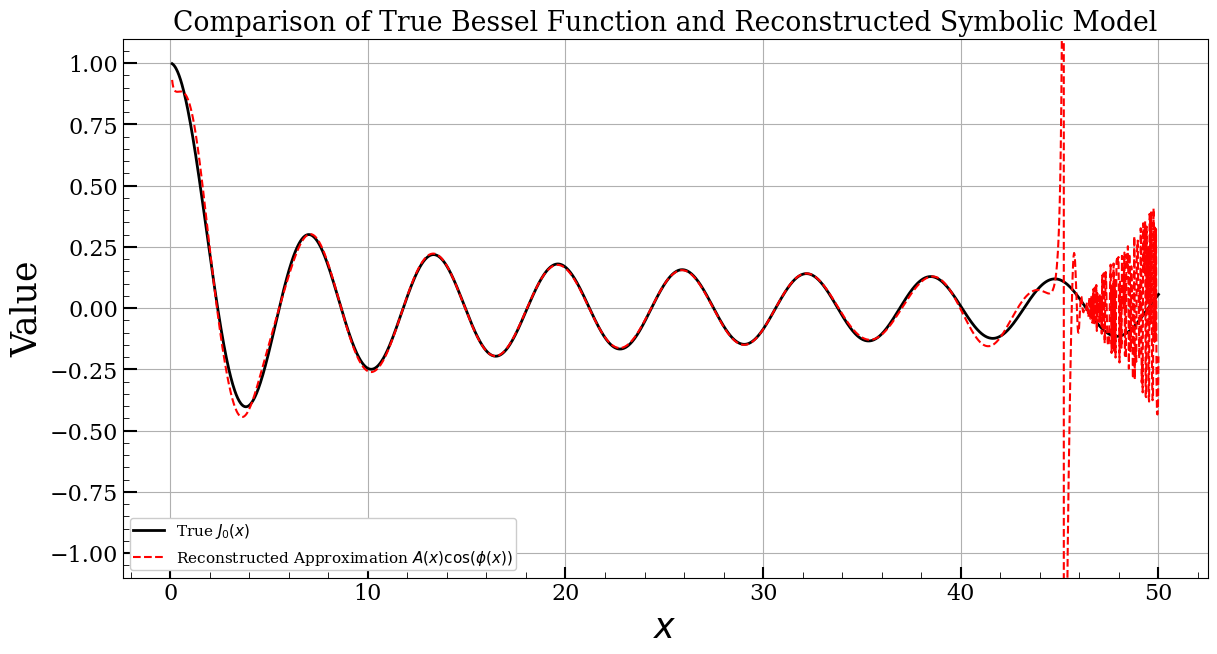

In [125]:
# Assume amplitude_bessel_0 and phase_bessel_0 objects are loaded.

# 1. Define the symbolic variable
X1 = sp.Symbol('X1')

# 2. Extract the solution objects
amp_solution = amplitude_bessel_0.solutions[-1]
phase_solution = phase_bessel_0.solutions[-1]

# 3. Get the symbolic expressions
A_expr = amp_solution.sympy_expr
phi_expr = phase_solution.sympy_expr

# --- STEP 1: SUBSTITUTE NUMERICAL CONSTANTS ---
# This is the critical new step.
# NOTE: You might need to change '.params' to the correct attribute name 
# that holds the dictionary of constant values (e.g., .constants_).
A_numeric_expr = A_expr.subs(amp_solution.b_vals)
phi_numeric_expr = phi_expr.subs(phase_solution.b_vals)

# 4. Combine the now-numeric expressions
bessel_approx_expr = A_numeric_expr * sp.cos(phi_numeric_expr)

print("--- Final Expression with Numerical Constants ---")
print(bessel_approx_expr)
print("-" * 50)

# 5. Lambdify the final expression
# This now works because the only symbol left is X1.
# We keep the modules fix to be safe.
f_bessel_approx = sp.lambdify(
    (X1,), 
    bessel_approx_expr, 
    modules=[{'sqrt': np.sqrt}, 'numpy']
)

# 6. Generate data and plot (same as before)
x_data = np.linspace(0.1, 50, 2000)
order = 0
y_true = special.jv(order, x_data)

# This call will now succeed.
y_pred = f_bessel_approx(x_data)

# 7. Create the comparison plot
plt.figure(figsize=(14, 7))
plt.plot(x_data, y_true, label=f'True $J_{order}(x)$', color='black', linewidth=2)
plt.plot(x_data, y_pred, label=r'Reconstructed Approximation $A(x) \cos(\phi(x)) $', color='red', linestyle='--')
plt.title('Comparison of True Bessel Function and Reconstructed Symbolic Model')
plt.xlabel('$x$')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)
plt.show()
# Assume amplitude_bessel_0 and phase_bessel_0 objects are loaded.
